In [ ]:
# time series analysis techniques, such as forecasting,
# residual - unexpected fluctuations in data are called residual

stationary data is data whose statistical properties, such as mean, variance, and autocorrelation, don't change over time

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/AirPassengers.csv')

In [ ]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data['Month'] = pd.to_datetime(data['Month'])

In [ ]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
data.isnull().sum()

,0
Month,0
#Passengers,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
data.set_index("Month", inplace = True)

In [ ]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

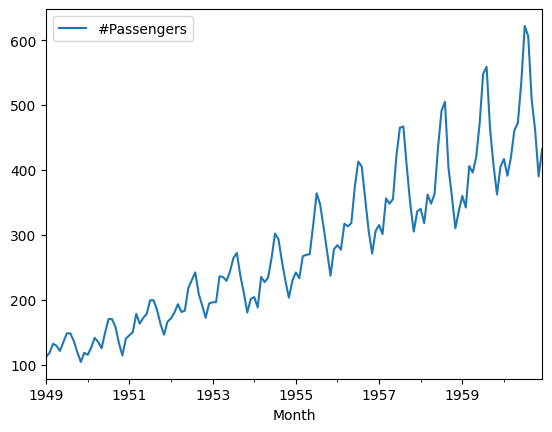

In [ ]:
data.plot()

This graph shows that our data has some trend

seasonal decompose---
3 main componenets
-trend--the overall direction or pattern in the data over a long period
-seasonality--the repeating short term cycle in the data
-residual(noise)---the sudden random variation or noise left over after removing the trend and sesonality

Figure(640x480)


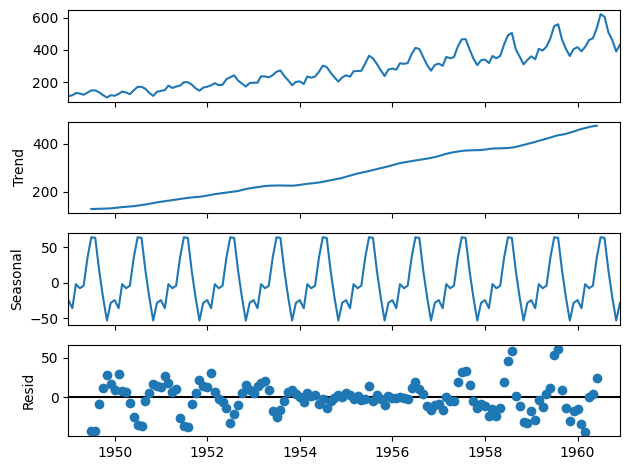

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(data)
print(decomposed.plot())

ADF --augumented dickey fuller test is a statiscal test used to ckeck for stationarity in the data.
-constant mean, variance

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(data)

In [ ]:
pval = test_result[1]
pval

0.991880243437641

In [ ]:
#null hypo---data is not stationary
#alter---data is stationary


# if p val < 0.05--we accept alternate
#greater---- we accept null

In [ ]:
if pval < 0.05:
  print("data is stationary")
else:
  print("data is not stationary")

data is not stationary


In [ ]:
'''
# 1. Stabilize mean and variance
#       - remove seasonality
#       - remove trend
# Logirithmic Transformation - Logairitm to the data to stabilize the variance
# (reduce - heteroscedasticity -> error term when reducing / stabilizing variance) ->> helps in making data stationary
# -->> transformation compress the scale of data especially for large values,
# and is particularly useful when dealing with trends in time series analysis.
'''

'''
# Imputation - replace the null values
# mode - for categorical data
# mean - numerical data
# median - replace outliers
'''

'\n# Imputation - replace the null values\n# mode - for categorical data\n# mean - numerical data\n# median - replace outliers\n'

<Axes: xlabel='Month'>

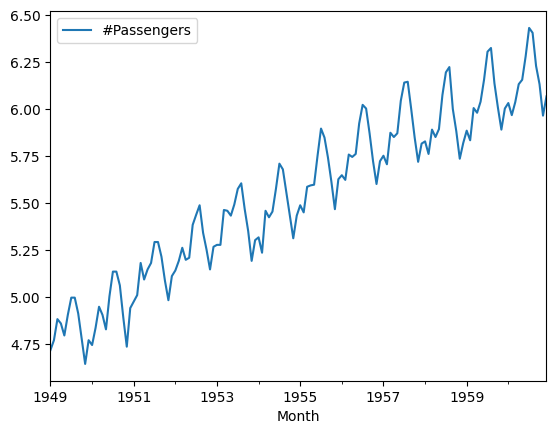

In [ ]:
first_log = np.log(data)
# May be having null values after applying log function
first_log = first_log.dropna()
first_log.plot()

In [ ]:
first_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
# Rolling mean - Computes with moving average of time series over a specified window
# window - time periods (yearly / monthly)

In [ ]:
# (In this case  -- 12 periods (window size))
# It helps smooth out short term fluctuations(noise) and highlight long term trends
# makes data stationary

'''
rolling Standard deviation -- computes moving standard deviation over the same window,
showing how much variation exist around rolling window
'''

'\nrolling Standard deviation -- computes moving standard deviation over the same window,\nshowing how much variation exist around rolling window\n'

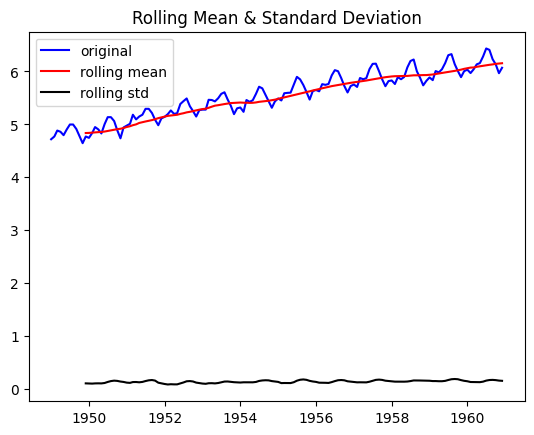

In [ ]:
mean_log = first_log.rolling(window = 12).mean()
std_log = first_log.rolling(window = 12).std()
plt.plot(first_log, color = 'blue', label = 'original')
plt.plot(mean_log, color = 'red', label = 'rolling mean')
plt.plot(std_log, color = 'black', label = 'rolling std')
plt.legend(loc = 'best')    # loc is location to fit the graph
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = True)

In [ ]:
mean_log.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
# As the window size is 12, the no of data present above that particulat data should be 11 otherwise it will be NaN

In [ ]:
# Achiecheving Stationary by subtracting the rolling mean from log transform data, we are removing the trend component from the data..
# This is common technique to achieve the stationary

In [ ]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head(20)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


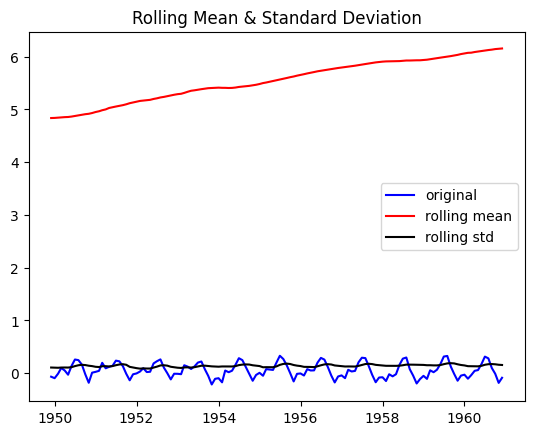

In [ ]:
# mean_log = first_log.rolling(window = 12).mean()
# std_log = first_log.rolling(window = 12).std()
plt.plot(new_data, color = 'blue', label = 'original')
plt.plot(mean_log, color = 'red', label = 'rolling mean')
plt.plot(std_log, color = 'black', label = 'rolling std')
plt.legend(loc = 'best')    # loc is location to fit the graph
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = True)

<Axes: xlabel='Month'>

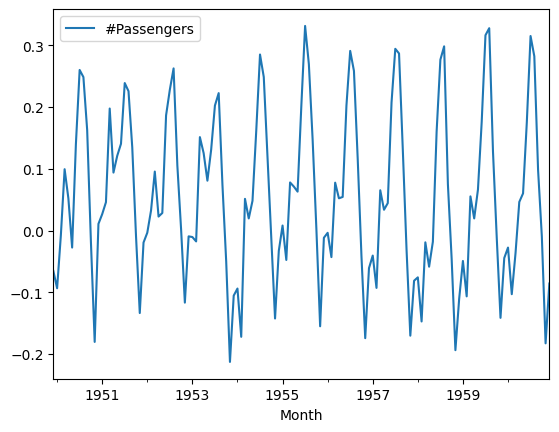

In [ ]:
new_data.plot()

In [ ]:
# To chk data whether data is stationary or not by p value
result = adfuller(new_data)
p_value = result[1]
p_value

0.022234630001242206

In [ ]:
# The data is stationary when p value is less that 0.05

In [ ]:
if p_value < 0.05:
  print("data is stationary")
else:
  print("data is not stationary")

data is stationary


In [ ]:
# MODEL BUILDING

In [ ]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [ ]:
# training and testing data can be any values
train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[120:]['#Passengers']

In [ ]:
train

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1959-07-01,0.316430
1959-08-01,0.327838
1959-09-01,0.128057


In [ ]:
train.shape

(120,)

In [ ]:
test.shape

(13,)

In [ ]:
# ARIMA model - Autoregressive integrated moving average
# A statistical model is autoregressive if it predicts future values based on past values.
'''
3 components - p, d, q
p - order of lag
d - degree of differencing  (in our case d = 1)
q - order of moving average
'''

'''
p - how many past values we want to use for prediction
d - how many times you need to subtract the past values to make data stabilize
q - how many past errors we want to use to improve prediction
'''

'\np - how many past values we want to use for prediction\nd - how many times you need to subtract the past values to make data stabilize\nq - how many past errors we want to use to improve prediction\n'

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
A_model = ARIMA(train, order =(3,1,3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
A_model = A_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
new_data["ARIMA_prediction"] = A_model.predict(start = len(train), end = len(train)+ len(test)-1)

In [ ]:
new_data.tail(12)

,#Passengers,ARIMA_prediction
Month,,
1960-01-01,-0.027530,-0.115341
1960-02-01,-0.103067,-0.051713
1960-03-01,-0.036530,0.045860
1960-04-01,0.046332,0.101329
1960-05-01,0.060186,0.144333
1960-06-01,0.175033,0.136877
1960-07-01,0.315151,0.116475
1960-08-01,0.282363,0.071298
1960-09-01,0.098235,0.035760


<Axes: xlabel='Month'>

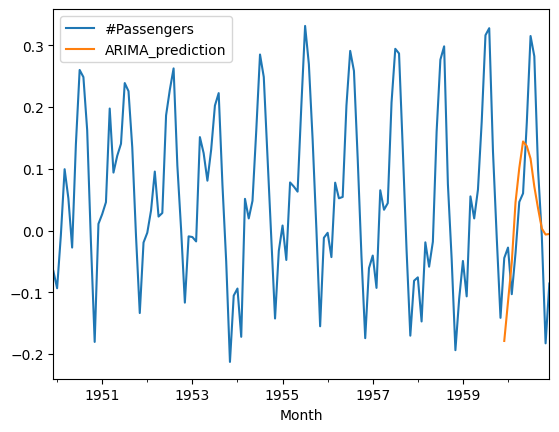

In [ ]:
new_data[['#Passengers',"ARIMA_prediction"]].plot()

In [ ]:
# Both are over lapping, it is not optimal
# To get crct p, d, q values which give optimal

In [ ]:
from sklearn.metrics import *

In [ ]:
import itertools
p = range(0,7)
d= range(1,2)
q=range(0,7)
pdq = list(itertools.product(p,d,q))
rmse = []
order1=[]
for i in pdq:
  model = ARIMA(train, order = i)
  model_fit =  model.fit()
  pred = model_fit.predict(start = len(train), end = len(train)+ len(test)-1)
  error = np.sqrt(mean_squared_error(test,pred))
  order1.append(i)
  rmse.append(error)

  results = pd.DataFrame(index = order1, data= rmse, columns =['RMSE'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [ ]:
results.sort_values(by = 'RMSE')

,RMSE
"(6, 1, 6)",0.068580
"(4, 1, 6)",0.072426
"(5, 1, 6)",0.074114
"(6, 1, 1)",0.097964
"(6, 1, 5)",0.111533
"(4, 1, 3)",0.114331
"(3, 1, 3)",0.115135
"(6, 1, 2)",0.124454
"(4, 1, 5)",0.125979
"(6, 1, 3)",0.134057


In [ ]:
new_data["ARIMA_prediction"] = A_model.predict(start = len(train), end = len(train)+ len(test)-1)

<Axes: xlabel='Month'>

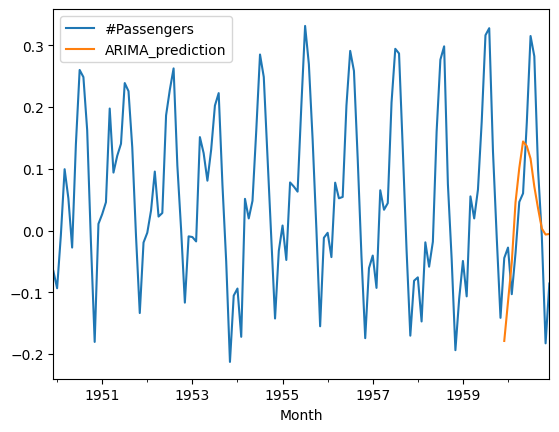

In [ ]:
new_data[['#Passengers',"ARIMA_prediction"]].plot()

In [ ]:
# Still it is colliding
# So, we use Sarimax
# Sarimax -- seasonal auto regressive integrated moving average exogenous factors
# when we need to highlight seosonal component

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train, order = (6, 1, 6), seasonal_order = (6, 1, 6, 12))   # As giving monthly
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
new_data['S_predict'] = model.predict(start = len(train), end = len(train)+len(test)-1)

<Axes: xlabel='Month'>

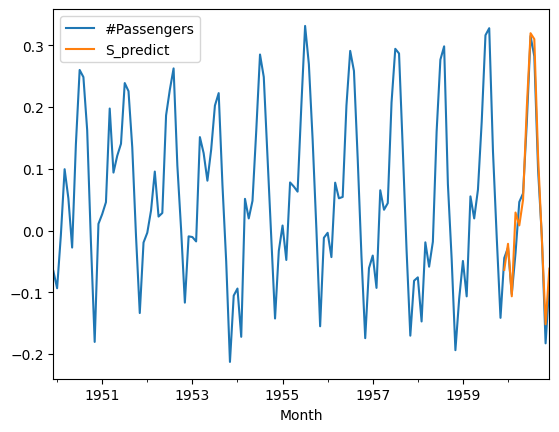

In [ ]:
new_data[['#Passengers', 'S_predict']].plot() # Use a list of column names to select multiple columns

<Axes: xlabel='Month'>

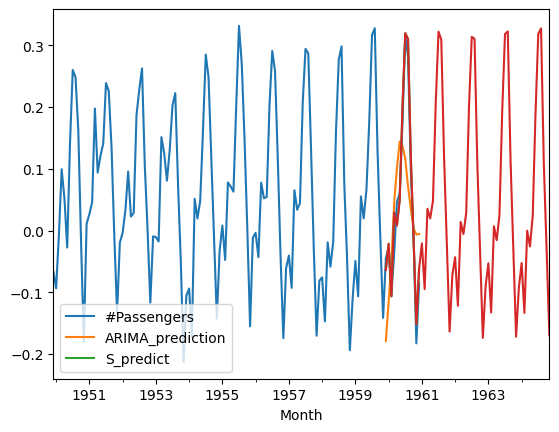

In [ ]:
# Predict for next 5 years
# (12*5 = 60)
future = model.forecast(steps = 60)
new_data.plot()
future.plot()